<h1 align='center'>Proyecto Individual 2</h1>
<h3 align='center'><i>Telecomunicaciones</i></h3>
<h4 align='center'><i>Cohorte:DataPT04</i></h4>

# `EDA:`**`Exploración y análisis de datos`**

In [1]:
# Importamos las librerías necesarias para empezar el análisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### *Abrimos los datasets:* `Internet.csv` y `Telefonia_Fija`

In [2]:
df1 = pd.read_csv('./dataset/Internet.csv')
df2 = pd.read_csv('./dataset/Telefonia_Fija.csv')

In [3]:
# Abrimos el dataset de internet
df1.head(2)

,Año,Trimestre,Provincia,Accesoactual,ADSL,Cablemodem,Fibra óptica,Wireless,Periodo,Ingresos (miles de pesos)
0,2022,4,Buenos Aires,78.94,1,6,3,573,Oct-Dic 2022,72
1,2022,4,Capital Federal,122.73,1,6,3,573,Oct-Dic 2022,72


In [4]:
# Eliminamos las columnas: 'ADSL', 'Cablemodem' y 'Wireless' porque no las voy a utilizar.
df1 = df1.drop(['ADSL','Cablemodem','Wireless','Ingresos (miles de pesos)'],axis=1)

In [5]:
# Internet con 6 columnas y 864 registros
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    int64  
 1   Trimestre     864 non-null    int64  
 2   Provincia     864 non-null    object 
 3   Accesoactual  864 non-null    float64
 4   Fibra óptica  864 non-null    int64  
 5   Periodo       864 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 40.6+ KB


In [6]:
# Abrimos el dataset de telefonia fija
df2.head(2)

,Año,Trimestre,Provincia,AccesoactualTel
0,2014,1,Buenos Aires,8.526
1,2014,1,Capital Federal,12.857


In [7]:
# Telefonía fija con 4 columnas y 864 registros
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              864 non-null    int64  
 1   Trimestre        864 non-null    int64  
 2   Provincia        864 non-null    object 
 3   AccesoactualTel  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [8]:
# Fusionamos los archivos anteriores, usando el método 'merge' y uniendo en las columnas:'Año','Trimestre' y 'Provincia'
df = pd.merge(df1,df2, on=['Año','Trimestre','Provincia'])

In [9]:
# Verificamos el resultado
df.head()

,Año,Trimestre,Provincia,Accesoactual,Fibra óptica,Periodo,AccesoactualTel
0,2022,4,Buenos Aires,78.94,3,Oct-Dic 2022,5.350
1,2022,4,Capital Federal,122.73,3,Oct-Dic 2022,12.273
2,2022,4,Catamarca,65.77,3,Oct-Dic 2022,2.365
3,2022,4,Chaco,43.62,3,Oct-Dic 2022,2.001
4,2022,4,Chubut,85.57,3,Oct-Dic 2022,2.840


In [10]:
# Reduciéndose 7 columnas y 792 registros
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              792 non-null    int64  
 1   Trimestre        792 non-null    int64  
 2   Provincia        792 non-null    object 
 3   Accesoactual     792 non-null    float64
 4   Fibra óptica     792 non-null    int64  
 5   Periodo          792 non-null    object 
 6   AccesoactualTel  792 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 49.5+ KB


In [11]:
# No hay datos nulos
# Eliminamos posibles duplicados
# Quedando los mismos 792 registros y 7 columnas.
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              792 non-null    int64  
 1   Trimestre        792 non-null    int64  
 2   Provincia        792 non-null    object 
 3   Accesoactual     792 non-null    float64
 4   Fibra óptica     792 non-null    int64  
 5   Periodo          792 non-null    object 
 6   AccesoactualTel  792 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 49.5+ KB


## `Para trabajar con Internet y Telefonía, tenemos  7 columnas y 792 registros.`

### `Para trabajar con Internet`
Contemplamos 2 aspectos suscritos a su vez en dos ambitos `trimestre` y `provincia`:
1. `Acceso actual`
2. `Fibra óptica`

### 1. `Acceso actual`

#### `Graficando un boxplot de la columna Accesoactual`

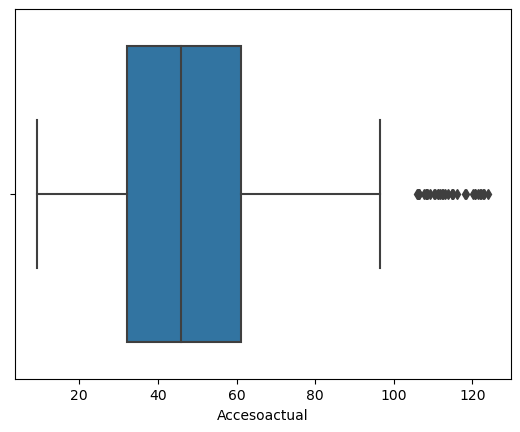

In [13]:
## Vemos algunos 'outliers' 
sns.boxplot(data=df,x='Accesoactual');

### `Vamos analizar la columna Accesoactual por trimestre`
* `Para buscar los rangos de los outliers`
* `Vamos a crear una tabla-pivote buscando los maximos para indagar mas acerca de los outliers`

In [14]:
# Buscamos los máximos de la columna: 'Accesoactual' para identificar los 'outliers'
g1=pd.pivot_table(data=df,index='Trimestre',values='Accesoactual',columns='Año',aggfunc=['max'])
g1

max                                                          \
Año          2014    2015    2016    2017    2018    2019    2020    2021   
Trimestre                                                                   
1          112.25  114.90  115.16  108.37  106.24  109.20  105.98  108.42   
2          113.14  116.07  120.04  124.06  106.53  110.55  106.41  110.14   
3          113.80  118.29  120.77  121.86  108.45  112.65  107.68  111.27   
4          114.90  118.13  120.63  122.90  108.27  106.25  108.31  111.27   

                   
Año          2022  
Trimestre          
1          111.80  
2          121.31  
3          122.28  
4          122.73

##### Con esta tabla g1:
*`podemos contar la cantidad de outliers de la columna Accesoactual y calcular un porcentaje contra el total de 792 registros que tenemos`*

In [15]:
# Así, encontramos la cantidad de outliers
df[df['Accesoactual']>=105.98].count()

Año                36
Trimestre          36
Provincia          36
Accesoactual       36
Fibra óptica       36
Periodo            36
AccesoactualTel    36
dtype: int64

In [16]:
# Y el porcentaje de outliers
print(round((36/792)*100,2),'%') 

4.55 %


#### *`Los outliers de la columna Accesoactual, estan representados en la tabla 'g1':`*
- *`Representando dicha tabla 36 valores outliers desde 105.98 a 124.06`*
- *`Estos valores outliers estan distribuidos desde el año 2014 al 2022 `*
- *`Representando una fracción de outliers de 36/792`*
- *`Resultando el 4.55 %`*

**`Graficamos g1`**

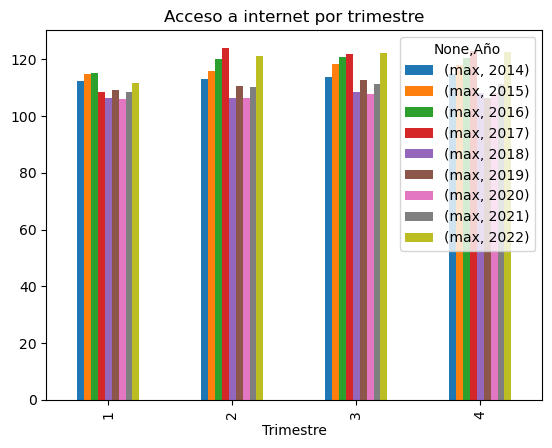

In [17]:
# Identificamos en la tabla 'g1', los 'outliers' de la columna 'Accesoactual'.
# Que se pueden ver en el gráfico mostrado el acceso a internet por trimestre.
g1.plot.bar()
plt.title('Acceso a internet por trimestre');

### `Ahora vamos a ver la columna Accesoactual por Provincia`
* `Utilizamos la mediana para no utilizar la media por los outliers.`
* `Buscamos las medianas de la columna:'Accesoactual' por provincia`
* `Creando una tabla-pivote buscando las medianas para ubicar cada provincia en este rubro`

In [18]:
# Procurando la mediana actual de acceso a internet por provincia.
g2=pd.pivot_table(data=df,index='Provincia',values='Accesoactual',columns='Trimestre',aggfunc=['median'])
g2

median                        
Trimestre             1       2       3       4
Provincia                                      
Buenos Aires      62.63   62.78   64.44   64.25
Capital Federal  109.20  113.14  113.80  114.90
Catamarca         32.19   32.13   32.49   32.23
Chaco             30.83   31.25   32.28   32.59
Chubut            43.00   46.99   47.57   51.15
Corrientes        32.66   33.81   34.25   34.57
Córdoba           63.52   63.27   64.24   65.09
Entre Ríos        48.68   49.20   50.22   54.37
Formosa           21.40   29.43   29.58   29.74
Jujuy             23.12   23.43   23.26   45.38
La Pampa          71.75   71.04   71.75   73.49
La Rioja          46.35   48.70   50.12   50.11
Mendoza           33.14   36.25   37.35   33.65
Misiones          30.96   31.63   32.10   34.45
Neuquén           61.02   61.91   60.83   60.87
Río Negro         49.82   50.15   50.54   51.86
Salta             39.78   39.94   39.84   39.80
San Juan          31.83   32.95   33.05   31.90
San Luis          15.15   15.15   52.35   67.55
Santa Cruz        28.94   29.38   33.29   28.91
Santa Fe          62.28   62.57   63.41   65.59
Tucumán           41.18   40.14   39.70   41.76

**`Graficamos g2`**

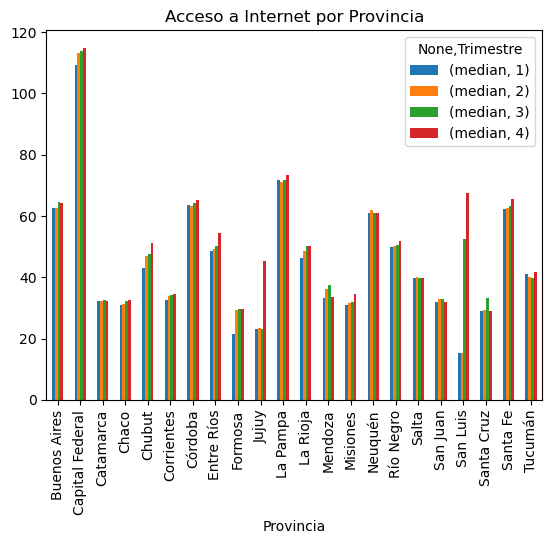

In [19]:
# Graficamos la tabla 'g2' para ver las medianas por 'Provincia'.
# El acceso a internet por provincia
g2.plot.bar()
plt.title('Acceso a Internet por Provincia');

#### En este análisis sobresale la provincia: 
* `Capital Federal y seguida de La Pampa`

In [20]:
## `Resumen Accesoactual`:
* `Los outliers son 36 valores desde 105.98 a 124.06 y distribuidos desde el año 2014 al 2022`.
* `Representando una fracción de 36/792 con un porcentaje de 4.55 %`
* `Dónde las provincias con mayor covertura en Acceso actual a internet son: Capital Federal y La Pampa.`

SyntaxError: invalid syntax (945490046.py, line 2)

### 2. `Fibra óptica`

#### `Graficando un boxplot de la columna Fibra optiva`

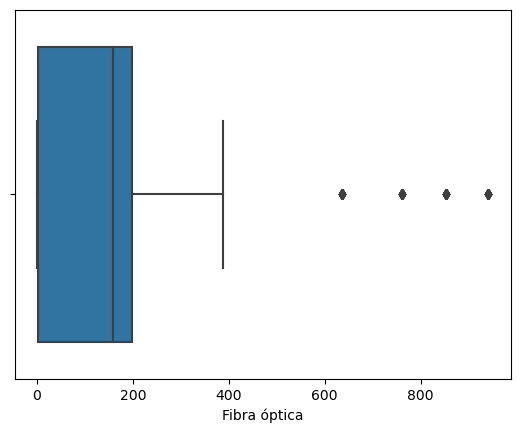

In [21]:
## Vemos algunos 'outliers' 
sns.boxplot(data=df,x='Fibra óptica');   

### `Vamos analizar la columna Fibra óptica por trimestre`
* `Para buscar los rangos de los outliers`
* `Vamos a crear una tabla-pivote buscando los maximos para indagar mas acerca de los outliers`

In [22]:
# Buscamos los máximos de la columna: 'Fibra óptica' para identificar los 'outliers'
g3=pd.pivot_table(data=df,index='Trimestre',values='Fibra óptica',columns='Año',aggfunc=['max'])
g3

max                                        
Año       2014 2015 2016 2017 2018 2019 2020 2021 2022
Trimestre                                             
1          150  168  164  180  217  637    1    1    2
2          149  151  168  181  226  761    1    1    3
3          155  163  170  194  247  852    1    2    3
4          150  139  178  211  388  941    1    2    3

##### Con esta tabla g3:
*`podemos contar la cantidad de outliers de la columna Fibra óptica y calcular un porcentaje contra el total de 792 registros que tenemos`*

In [23]:
# Así, encontramos la cantidad de outliers
df[df['Fibra óptica']>=637].count()

Año                88
Trimestre          88
Provincia          88
Accesoactual       88
Fibra óptica       88
Periodo            88
AccesoactualTel    88
dtype: int64

In [24]:
# Y el porcentaje de outliers
print(round((88/792)*100,2),'%')

11.11 %


#### *`Los outliers de la columna Fibra óptica, estan representados en la tabla 'g3':`*
- *`Representando dicha tabla con 22 valores outliers de 637 en Trimestre 1`*
- *`Representando dicha tabla con 22 valores outliers de 761 en Trimestre 2`*
- *`Representando dicha tabla con 22 valores outliers de 852 en Trimestre 3`*
- *`Representando dicha tabla con 22 valores outliers de 941 en Trimestre 4`*
- *`Cayendo todos los valores outliers en el año 2019`*
- *`Representando una fracción de outliers de 88/792`*
- *`Resultando el 11.11 %`*

**`Graficamos g3`**

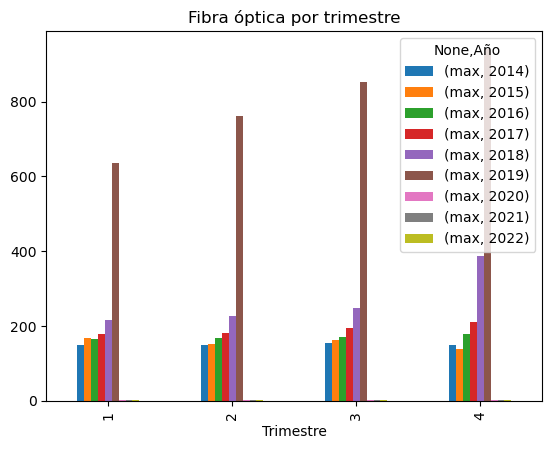

In [25]:
# Identificamos en la tabla 'g3', los outliers de la columna 'Fibra óptica'
# para acceder al internet por trimestre.
g3.plot.bar()
plt.title('Fibra óptica por trimestre');

### `Ahora vamos a ver la columna Fibra óptica por Provincia`
* `Utilizamos la mediana para no utilizar la media por los outliers.`
* `Buscamos las medianas de la columna:'Fibra óptica' por provincia`
* `Creando una tabla-pivote buscando las medianas para ubicar cada provincia en este rubro`

In [26]:
# Utilizamos la mediana para no utilizar la media por los outliers.
# Buscamos las medianas de la columna: 'Fibra óptica' por 'Provincia' para
# encontrar la mediana actual de acceso a internet por provincia.
g4=pd.pivot_table(data=df,index='Provincia',values='Fibra óptica',columns='Trimestre',aggfunc=['median'])
g4

median               
Trimestre            1    2    3    4
Provincia                            
Buenos Aires       164  151  163  150
Capital Federal    164  151  163  150
Catamarca          164  151  163  150
Chaco              164  151  163  150
Chubut             164  151  163  150
Corrientes         164  151  163  150
Córdoba            164  151  163  150
Entre Ríos         164  151  163  150
Formosa            164  151  163  150
Jujuy              164  151  163  150
La Pampa           164  151  163  150
La Rioja           164  151  163  150
Mendoza            164  151  163  150
Misiones           164  151  163  150
Neuquén            164  151  163  150
Río Negro          164  151  163  150
Salta              164  151  163  150
San Juan           164  151  163  150
San Luis           164  151  163  150
Santa Cruz         164  151  163  150
Santa Fe           164  151  163  150
Tucumán            164  151  163  150

**`Graficamos g4`**

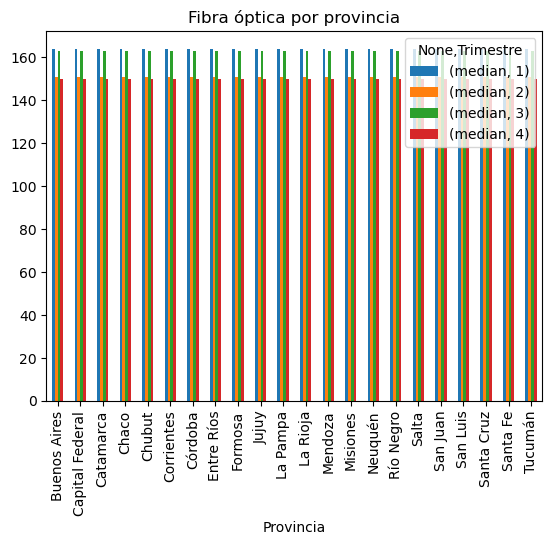

In [27]:
# Graficamos la tabla 'g4' para ver las medianas por 'Provincia'
# del acceso al internet con "Fibra óptica"
g4.plot.bar()
plt.title('Fibra óptica por provincia');

##### Todos los valores son idénticos en todas las provincias y trimestres respectivamente: 
* `Medianas = [164,151,163,150]`

#### `Graficando un boxplot de las columnas Fibra óptica y Provincia`

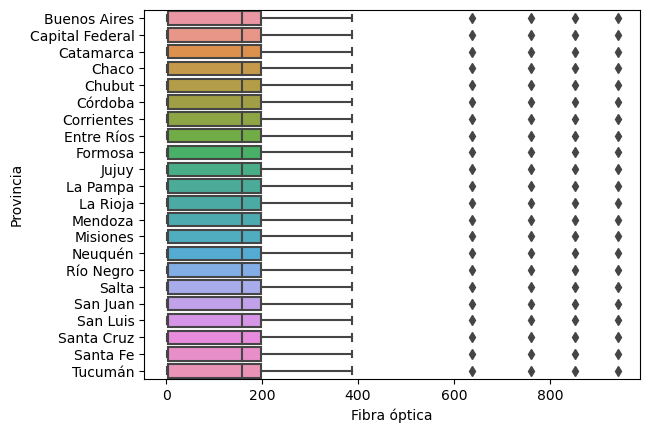

In [28]:
# Usamos este boxplot para proyectar en perspectiva los outliers de 'Fibra óptica'
# por 'Provincia'. Es decir, aquí observamos claramente los 4 grupos de outliers.
sns.boxplot(data=df, x='Fibra óptica', y='Provincia');

#### `Citamos nuevamente la tabla 'g3' de Fibra óptica`:
* `Para sustentar la gráfica de Fibra óptica por Provincia`

In [29]:
# Buscamos los máximos de la columna: 'Fibra óptica' para identificar los 'outliers'
g3=pd.pivot_table(data=df,index='Trimestre',values='Fibra óptica',columns='Año',aggfunc=['max'])
g3

max                                        
Año       2014 2015 2016 2017 2018 2019 2020 2021 2022
Trimestre                                             
1          150  168  164  180  217  637    1    1    2
2          149  151  168  181  226  761    1    1    3
3          155  163  170  194  247  852    1    2    3
4          150  139  178  211  388  941    1    2    3

##### `Los outliers en Fibra óptica caen en el año 2019  y ya sabemos que son 22 valores cada uno`:
* `Etiquetados como 637, 761, 852 y 941 para Trimestre 1, Trimestre 2, Trimestre 3 y Trimestre 4 respectivamente`

## `Resumen Fibra óptica`:
* Los outliers son `22` valores en todos los trimestres, siendo respectivamente `637`, `761`, `852` y `941` para `Trimestre 1`, `Trimestre 2`, `Trimestre 3` y `Trimestre 4`.
Cayendo todos los valores en el año `2019` con una fracción de `88/792` y porcentaje de `11.11 %`.
Siendo las medianas, valores idénticos en todas las provincias y trimestres respectivamente `164`, `151`, `163` y `150`
para `Trimestre 1`, `Trimestre 2`, `Trimestre 3` y `Trimestre 4`.

## `Acceso a Telefonía fija`
Contemplando 1 aspecto suscrito a su vez en dos ambitos `trimestre` y `provincia`:
1. `Acceso actual de telefonía fija`

### 1. `Acceso actual de telefonía fija`

#### `Graficando un boxplot de la columna AccesoactualTel`

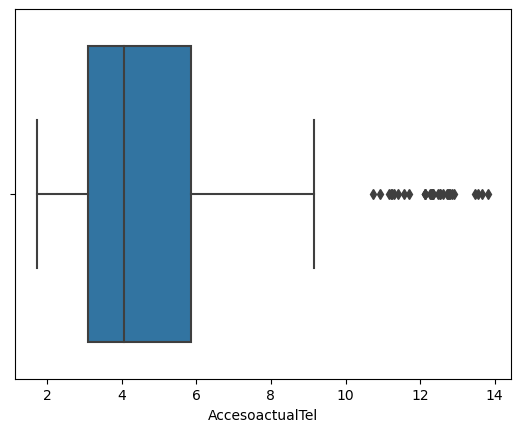

In [30]:
# Constatando con este boxplot de la columna: 'AccesoactualTel'
sns.boxplot(data=df,x='AccesoactualTel');

### `Vamos analizar la columna AccesoactualTel por trimestre`
* `Para buscar los rangos de los outliers`
* `Vamos a crear una tabla-pivote buscando los maximos para indagar mas acerca de los outliers`

In [31]:
# Buscamos los máximos de la columna: 'AccesoactualTel' para identificar los 'outliers'
g5=pd.pivot_table(data=df,index='Trimestre',values='AccesoactualTel',columns='Año',aggfunc=['max'])
g5

max                                                          \
Año          2014    2015    2016    2017    2018    2019    2020    2021   
Trimestre                                                                   
1          12.857  12.808  12.337  12.337  13.465  12.482  11.402  10.928   
2          12.768  12.899  12.127  12.127  13.561   8.903   7.444   6.668   
3          12.735  12.617  12.309  12.309  13.828  11.704  11.241  10.727   
4          12.729  12.124  12.525  12.525  13.667  11.569  11.179  11.299   

                   
Año          2022  
Trimestre          
1          11.215  
2           7.915  
3          12.300  
4          12.273

##### Con esta tabla g5:
*`podemos contar la cantidad de outliers de la columna AccesoactualTel y calcular un porcentaje contra el total de 792 registros que tenemos`*

In [32]:
# Así, encontramos la cantidad de outliers
df[df['AccesoactualTel']>=10.727].count()

Año                32
Trimestre          32
Provincia          32
Accesoactual       32
Fibra óptica       32
Periodo            32
AccesoactualTel    32
dtype: int64

In [33]:
# Y el porcentaje de outliers
print(round((32/792)*100,2),'%')

4.04 %


#### *`Los outliers de la columna AccesoactualTel, fluctúan entre los valores:`*
- *`desde 10.727 hasta 13.828, y cubriendo los años desde 2014 a 2022`*
- *`Representando una fracción 32/792`*
- *`Siendo el porcentaje de 4.04 %`*

**`Graficamos g5`**

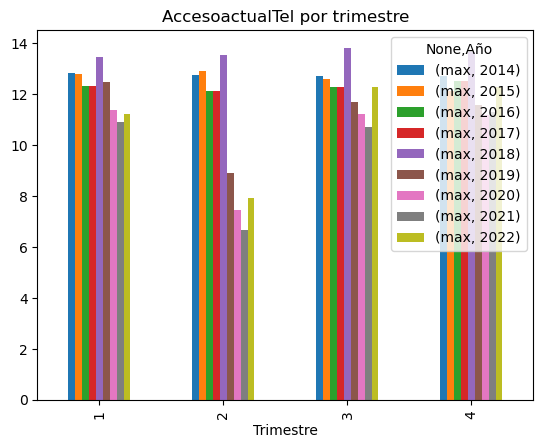

In [34]:
# Identificamos en la tabla 'g5', los outliers de la columna AccesoactualTel'
# por trimestre
g5.plot.bar()
plt.title('AccesoactualTel por trimestre');

### `Ahora vamos a ver la columna AccesoactualTel por Provincia`
* `Utilizamos la mediana para no utilizar la media por los outliers.`
* `Buscamos las medianas de la columna:'AccesoactualTel' por provincia`
* `Creando una tabla-pivote buscando las medianas para ubicar cada provincia en este rubro`

In [35]:
# Utilizamos la mediana para no utilizar la media por los outliers.
# Buscamos las medianas de la columna: 'AccesoactualTel' por 'Provincia' para
# encontrar la mediana actual de acceso a la telefonía fija por provincia.
g6=pd.pivot_table(data=df,index='Provincia',values='AccesoactualTel',columns='Trimestre',aggfunc=['median'])
g6

median                        
Trimestre             1       2       3       4
Provincia                                      
Buenos Aires      7.997   8.031   8.019   8.098
Capital Federal  12.337  12.127  12.309  12.273
Catamarca         3.707   3.678   3.643   3.548
Chaco             3.150   3.108   2.899   3.022
Chubut            5.759   5.731   5.732   5.792
Corrientes        3.444   3.417   3.265   3.330
Córdoba           6.155   6.068   5.971   5.923
Entre Ríos        5.319   5.257   4.914   5.079
Formosa           2.656   2.625   2.598   2.546
Jujuy             2.827   2.824   2.747   2.707
La Pampa          6.452   6.509   6.433   6.499
La Rioja          3.543   3.451   3.379   3.301
Mendoza           6.184   6.164   6.144   6.268
Misiones          3.090   3.221   3.087   3.089
Neuquén           5.072   5.051   5.034   5.134
Río Negro         5.751   5.728   5.713   5.787
Salta             4.003   3.927   3.845   3.735
San Juan          4.989   4.973   4.991   5.088
San Luis          3.138   3.128   3.117   3.634
Santa Cruz        4.311   4.288   4.255   4.235
Santa Fe          6.311   6.264   6.136   6.351
Tucumán           5.262   5.234   5.205   5.107

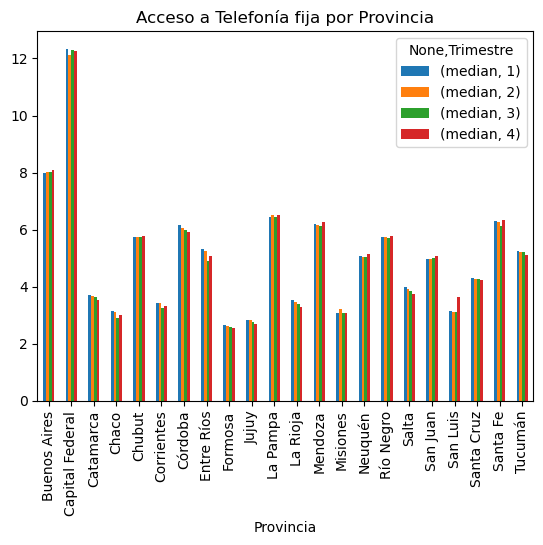

In [36]:
# Graficamos la tabla 'g6' para ver las medianas por 'Provincia'
# del acceso a la telefonía fija.
g6.plot.bar()
plt.title('Acceso a Telefonía fija por Provincia');

#### En este análisis sobresale la provincia: 
* `Capital Federal y seguida por Buenos Aires`

## `Resumen Telefonía fija`:
* Los outliers de la columna `AccesoactualTel`, fluctúan desde `10.727` hasta `13.828` entre los años `2014 al 2022` y siendo una fracción `32/792` 
que representa un porcentaje de `4.04 %`. En este análisis sobresale la provincia de `Capital Federal`, y seguida por `Buenos Aires`.

### `Nube de palabras de la columna Provincia`

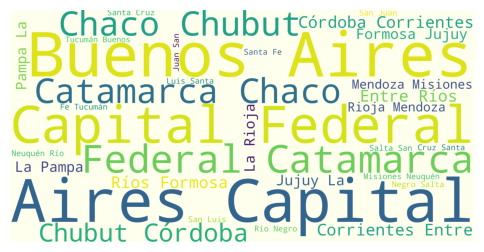

In [37]:
# Creamos variable para 'Provincia', para desplegar palabras que mas se repiten en provincias en acceso a internet y
# telefonia fija.
df['Provincia'] = df['Provincia'].astype('str')
df_wd = ' '.join(df['Provincia'])
df_wc = WordCloud(stopwords=STOPWORDS,background_color='#ffee',height=2000,width=4000).generate(df_wd)
plt.figure(figsize=(6,4))
plt.imshow(df_wc)
plt.axis('off');

#### Encontramos las palabras que más se repiten:
- **`Aires, Capital, Buenos Aires y Capital Federal`**

<h4 align='right'><i>Pag. 2</i></h4>